In [ ]:
import pandas as pd

# ----------------------
# original data: boston house price data.
# 'http://lib.stat.cmu.edu/datasets/boston'
# original data의 경우, 1개의 sample에 2개의 행이 할당되어
# 이에 대한 처리가 필요함.
#data_url = 'https://blog.kakaocdn.net/dn/bBaIM3/btsGBsBNUDl/irTKKK1MF1Y1o6JHpGn3n1/boston.csv?attach=1&knm=tfile.csv'
data_url =  'https://blog.kakaocdn.net/dn/bBaIM3/btsGBsBNUDl/irTKKK1MF1Y1o6JHpGn3n1/boston.csv?attach=1&knm=tfile.csv'
# read_csv
df = pd.read_csv(
    data_url,     # url or file path
    skiprows = 0, # num of rows to skip
    header = 0,   # header row
    sep = ','     # separator
)
df

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
class DsBostonDataset(Dataset):
  def __init__(self,x,y):
    self.x=torch.tensor(x).float()
    self.y=torch.tensor(y).float()

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx],self.y[idx]

In [ ]:
df.shape

(506, 14)

In [ ]:

tmp = df.values#데이터 프레임 객체에서 넘파이 객체 얻어옴
y = tmp[ : ,-1]
x= tmp[ : , :-1]

dataset = DsBostonDataset(x,y)

In [ ]:
x.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
from torch.utils.data import DataLoader

data_loader = DataLoader(
    dataset,
    batch_size = 100,
    shuffle = True,
)

for batch_idx, (data, labels) in enumerate(data_loader):
    print(f'{batch_idx=}')
    print(f'{data.shape}')
    print(f'{labels.shape}')

batch_idx=0
torch.Size([100, 13])
torch.Size([100])
batch_idx=1
torch.Size([100, 13])
torch.Size([100])
batch_idx=2
torch.Size([100, 13])
torch.Size([100])
batch_idx=3
torch.Size([100, 13])
torch.Size([100])
batch_idx=4
torch.Size([100, 13])
torch.Size([100])
batch_idx=5
torch.Size([6, 13])
torch.Size([6])


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RN', 'AGE', 'DIS', 'RAD', 'TAX',
       'PIRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

array([[<Axes: xlabel='RN', ylabel='RN'>,
        <Axes: xlabel='B', ylabel='RN'>,
        <Axes: xlabel='AGE', ylabel='RN'>,
        <Axes: xlabel='LSTAT', ylabel='RN'>,
        <Axes: xlabel='MEDV', ylabel='RN'>],
       [<Axes: xlabel='RN', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='AGE', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>,
        <Axes: xlabel='MEDV', ylabel='B'>],
       [<Axes: xlabel='RN', ylabel='AGE'>,
        <Axes: xlabel='B', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='MEDV', ylabel='AGE'>],
       [<Axes: xlabel='RN', ylabel='LSTAT'>,
        <Axes: xlabel='B', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>],
       [<Axes: xlabel='RN', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'

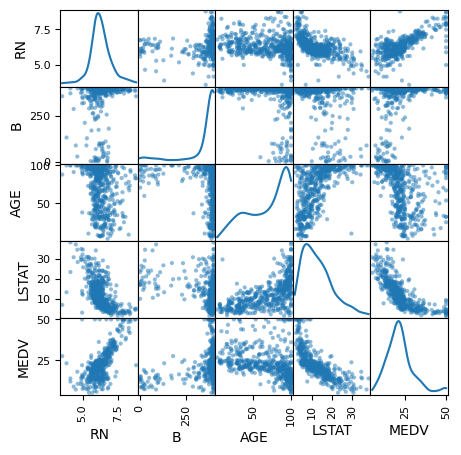

In [ ]:
from pandas.plotting import scatter_matrix as sm

sm( df[[ 'RN', 'B', 'AGE', 'LSTAT', 'MEDV',]],
   diagonal = 'kde',
    figsize=(5,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RN       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RN,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.describe()[['RN','LSTAT', 'TAX']]#비교가능해짐

,RN,LSTAT,TAX
count,506.000000,506.000000,506.000000
mean,6.284634,12.653063,408.237154
std,0.702617,7.141062,168.537116
min,3.561000,1.730000,187.000000
25%,5.885500,6.950000,279.000000
50%,6.208500,11.360000,330.000000
75%,6.623500,16.955000,666.000000
max,8.780000,37.970000,711.000000


Text(0.5, 1.0, 'Boston Housing Data')

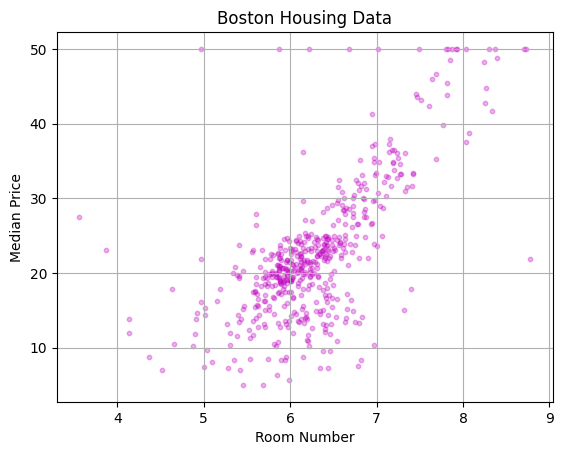

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,1)
axes.scatter (
    df['RN'],
    df['MEDV'],
    alpha = 0.3,
    s=10,
    c='m',
)

axes.grid()
axes.set_xlabel('Room Number')
axes.set_ylabel('Median Price')
axes.set_title('Boston Housing Data')



In [ ]:
from sklearn.model_selection import train_test_split

train_test_split #(?)

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.3,
    random_state = 23
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=23,
)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(283, 13)
(71, 13)
(152, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

print(x_train.mean(), x_train.std())
print(x_train_s.mean(), x_train_s.std())

69.53480649633053 143.75209963025105
1.5605287591578172e-15 1.0000000000000002


In [ ]:
from pickle import dump, load

with open('ds_standard_scaler.pkl' , 'wb')as f :
  dump(scaler,f)


In [ ]:
with open('ds_standard_scaler.pkl' , 'rb')as f:
    loaded_scaler = load(f)

n_x_test_s = loaded_scaler.transform(x_test)

import numpy as np
np.array_equal(x_test_s, n_x_test_s)

True

In [ ]:
#x_train_s, y_train, x_test_s, y_test, x_val_s, y_val
val_dataset = DsBostonDataset(x_train_s, y_val)
test_dataset = DsBostonDataset(x_train_s, y_test)
train_dataset = DsBostonDataset(x_train_s, y_train)


In [ ]:
from torch.nn import Module, Linear, ReLU


class DsANN(Module):
  def __init__(self, n_in_f, n_out_f):
    #super(DsANN,self).__init__()
    super().__init__()

    layers = [(n_in_f,26),(26,26),(26, 13)]

    for idx, lay_info in enumerate(layers):

      self.add_module(f'linear{idx}', Linear(*lay_info, bias=True))
      self.add_module(f'relu{idx}', ReLU())

    self.addmodule(f'output', Linear(13,1))


    #..

  def forward(self, x):
    #..
    for i in self.children():
      x=i(x)
    return x